## Handling Imbalanced Dataset

1. Up Sampling
2. Down Sampling

In [2]:
import numpy as np
import pandas as pd

# Set the random seed for reproducibility
np.random.seed(123)

# Create a dataframe with two classes
n_samples = 1000
class_0_ratio = 0.9
n_class_0 = int(n_samples * class_0_ratio)
n_class_1 = n_samples - n_class_0

In [3]:
n_class_0,n_class_1

(900, 100)

In [7]:
## CREATE MY DATAFRAME WITH IMBALANCED DATASET
class_0 = pd.DataFrame({
    'feature_1': np.random.normal(loc=0, scale=1, size=n_class_0),
    'feature_2': np.random.normal(loc=0, scale=1, size=n_class_0),
    'target': [0] * n_class_0
})

class_1 = pd.DataFrame({
    'feature_1': np.random.normal(loc=2, scale=1, size=n_class_1),
    'feature_2': np.random.normal(loc=2, scale=1, size=n_class_1),
    'target': [1] * n_class_1
})

In [8]:
class_0

,feature_1,feature_2,target
0,-1.774224,0.285744,0
1,-1.201377,0.333279,0
2,1.096257,0.531807,0
3,0.861037,-0.354766,0
4,-1.520367,-1.120815,0
...,...,...,...
895,-0.896718,2.540514,0
896,0.812571,-0.082706,0
897,0.637361,0.444621,0
898,0.332712,1.896404,0


In [9]:
class_1

,feature_1,feature_2,target
0,-0.643425,2.571923,1
1,1.551009,1.782767,1
2,1.641093,2.054318,1
3,2.133194,2.155998,1
4,1.355758,2.467810,1
...,...,...,...
95,2.677156,1.092048,1
96,2.963404,0.181955,1
97,1.621476,1.877267,1
98,3.429559,3.794486,1


In [10]:
df=pd.concat([class_0,class_1]).reset_index(drop=True)

In [70]:
df

,feature_1,feature_2,target
0,-1.085631,0.551302,0
1,0.997345,0.419589,0
2,0.282978,1.815652,0
3,-1.506295,-0.252750,0
4,-0.578600,-0.292004,0
...,...,...,...
995,1.376371,2.845701,1
996,2.239810,0.880077,1
997,1.131760,1.640703,1
998,2.902006,0.390305,1


In [14]:
import seaborn as sns

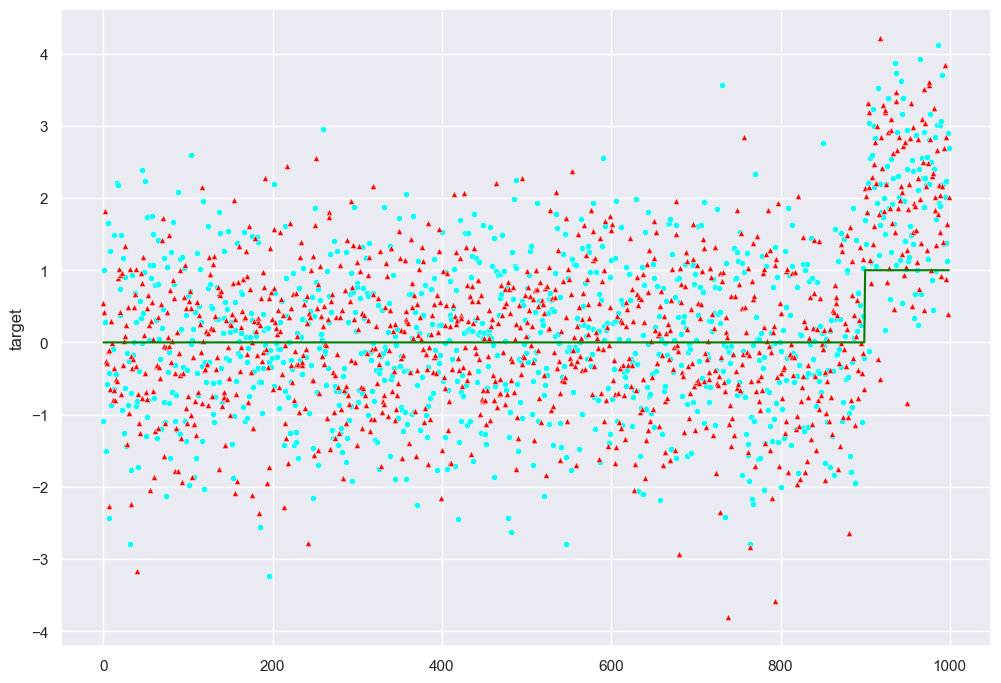

In [68]:
sns.lineplot(df['target'], color = 'green')
sns.scatterplot(df['feature_1'], color = 'cyan', s = 20, marker ='o')
sns.scatterplot(df['feature_2'], color = 'red', s = 20, marker ='^')

sns.set_theme(rc={'figure.figsize':(12,8.27)})

In [19]:
df['target'].value_counts()

target
0    900
1    100
Name: count, dtype: int64

In [26]:
## upsampling
df_minority=df[df['target']==1]
df_majority=df[df['target']==0]

In [29]:
df_minority

,feature_1,feature_2,target
900,-0.643425,2.571923,1
901,1.551009,1.782767,1
902,1.641093,2.054318,1
903,2.133194,2.155998,1
904,1.355758,2.467810,1
...,...,...,...
995,2.677156,1.092048,1
996,2.963404,0.181955,1
997,1.621476,1.877267,1
998,3.429559,3.794486,1


In [30]:
from sklearn.utils import resample
df_minority_upsampled=resample(df_minority,replace=True, #Sample With replacement
         n_samples=len(df_majority),
         random_state=42
        )

In [31]:
df_minority_upsampled.shape

(900, 3)

In [76]:
df_minority_upsampled

,feature_1,feature_2,target
951,2.905343,1.495151,1
992,2.000977,1.814833,1
914,1.927957,2.280911,1
971,2.819483,2.964646,1
960,2.456515,1.833528,1
...,...,...,...
952,1.766644,1.532225,1
965,1.527330,2.182477,1
976,2.463277,0.795616,1
942,2.930412,1.067353,1


In [99]:
df_upsampled=pd.concat([df_majority,df_minority_upsampled]).reset_index(drop=True)

In [100]:
df_upsampled

,feature_1,feature_2,target
0,-1.085631,0.551302,0
1,0.997345,0.419589,0
2,0.282978,1.815652,0
3,-1.506295,-0.252750,0
4,-0.578600,-0.292004,0
...,...,...,...
1795,1.766644,1.532225,1
1796,1.527330,2.182477,1
1797,2.463277,0.795616,1
1798,2.930412,1.067353,1


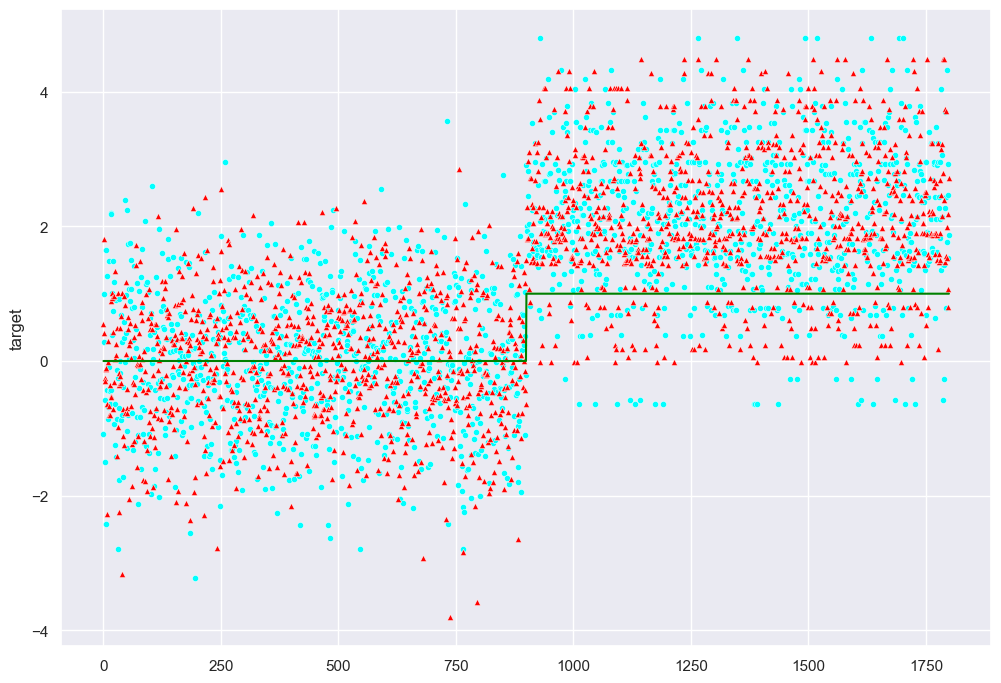

In [101]:
sns.lineplot(df_upsampled['target'], color = 'green')
sns.scatterplot(df_upsampled['feature_1'], color = 'cyan', s = 20, marker ='o')
sns.scatterplot(df_upsampled['feature_2'], color = 'red', s = 20, marker ='^')

sns.set_theme(rc={'figure.figsize':(12,8.27)})

In [56]:
df_upsampled['target'].value_counts()

target
0    900
1    900
Name: count, dtype: int64

## Down Sampling

In [102]:
import pandas as pd

# Set the random seed for reproducibility
np.random.seed(123)

# Create a dataframe with two classes
n_samples = 1000
class_0_ratio = 0.9
n_class_0 = int(n_samples * class_0_ratio)
n_class_1 = n_samples - n_class_0

class_0 = pd.DataFrame({
    'feature_1': np.random.normal(loc=0, scale=1, size=n_class_0),
    'feature_2': np.random.normal(loc=0, scale=1, size=n_class_0),
    'target': [0] * n_class_0
})

class_1 = pd.DataFrame({
    'feature_1': np.random.normal(loc=2, scale=1, size=n_class_1),
    'feature_2': np.random.normal(loc=2, scale=1, size=n_class_1),
    'target': [1] * n_class_1
})

df = pd.concat([class_0, class_1]).reset_index(drop=True)

# Check the class distribution
print(df['target'].value_counts())

target
0    900
1    100
Name: count, dtype: int64


In [103]:
## downsampling
df_minority=df[df['target']==1]
df_majority=df[df['target']==0]

In [104]:
from sklearn.utils import resample
df_majority_downsampled=resample(df_majority,replace=False, #Sample With replacement
         n_samples=len(df_minority),
         random_state=42
        )

In [105]:
df_majority_downsampled

,feature_1,feature_2,target
70,0.468439,1.720920,0
827,1.089165,-0.464899,0
231,0.753869,-0.969798,0
588,0.588686,-0.704720,0
39,0.283627,1.012868,0
...,...,...,...
398,-0.168426,0.553775,0
76,-0.403366,0.081491,0
196,-0.269293,0.611238,0
631,-0.295829,0.671673,0


In [106]:
df_downsampled=pd.concat([df_minority,df_majority_downsampled]).reset_index(drop=True)
df_downsampled

,feature_1,feature_2,target
0,1.699768,2.139033,1
1,1.367739,2.025577,1
2,1.795683,1.803557,1
3,2.213696,3.312255,1
4,3.033878,3.187417,1
...,...,...,...
195,-0.168426,0.553775,0
196,-0.403366,0.081491,0
197,-0.269293,0.611238,0
198,-0.295829,0.671673,0


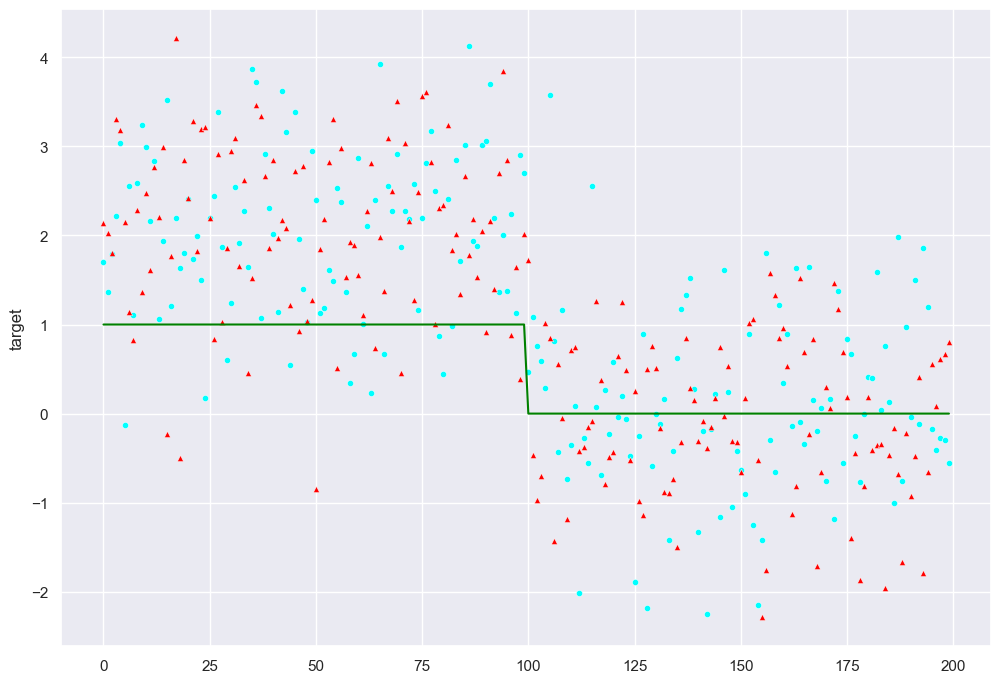

In [107]:
sns.lineplot(df_downsampled['target'], color = 'green')
sns.scatterplot(df_downsampled['feature_1'], color = 'cyan', s = 20, marker ='o')
sns.scatterplot(df_downsampled['feature_2'], color = 'red', s = 20, marker ='^')

sns.set_theme(rc={'figure.figsize':(12,8.27)})